# Boston Housing Prices Data Analysis



In [18]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

# Introduction to the dataset

For this analysis, I will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).


In [19]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [20]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

# Descriptive analysis

## Histogram of housing prices

A very basic histogram of median housing prices (the "target" variable) for the dataset.  Your first task is to make this graph look pretty by doing the following:


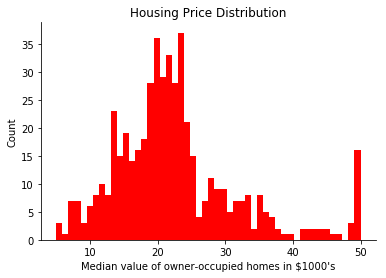

In [21]:

%matplotlib inline  
import matplotlib.pyplot as plt  

bdata_arr = np.insert(bdata.data, bdata.data.shape[1], bdata.target, axis = 1)

#Change the bin width on the histogram to be $1000
#Change the color of the bars to be green, and remove the black borders from the bars
plt.hist(bdata_arr[:,13],color="red",edgecolor = "none", bins=50)
ax = plt.axes()
#Remove the axes on the top and right side of the plot window
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel("Count")
plt.title('Housing Price Distribution')
plt.show()

## Scatter plot of housing prices and crime

Using matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis). 


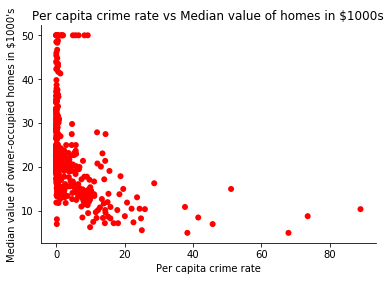

In [22]:
plt.scatter(bdata_arr[:,0],bdata_arr[:,13],color="red",edgecolor = "none")
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xlabel("Per capita crime rate")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.title("Per capita crime rate vs Median value of homes in $1000s")
plt.show()

## Scatter plot of housing prices and owner-occupied units

Using matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the proportion of owner-occupied home units.

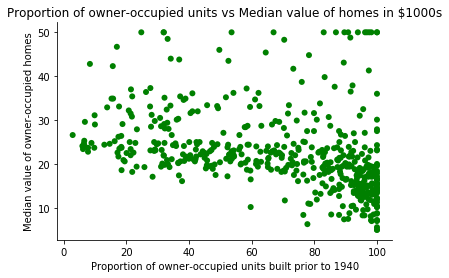

In [23]:
plt.scatter(bdata_arr[:,6],bdata_arr[:,13],color="green",edgecolor = "none")
ax = plt.axes()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Median value of owner-occupied homes")
plt.title("Proportion of owner-occupied units vs Median value of homes in $1000s")
plt.show()

---

## Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

First, we write a function to compute the Root Mean Squared Error for a list of numbers

In [24]:
def compute_rmse(predictions, yvalues):
    rmse = np.sqrt(((predictions - yvalues) ** 2).mean())    
    return rmse

#print (compute_rmse(np.asarray((2,2,3)),np.asarray((0,2,6))))

Next, divide the data into training and testing datasets

Randomly selecting 66% of the data and putting this in a training dataset (bdata_train), and place the remaining 34% in a testing dataset (bdata_test)


In [25]:
from sklearn.cross_validation import train_test_split

np.random.seed(seed=13579)

bdata_train,bdata_test = train_test_split(bdata_arr, test_size=0.34, random_state=13579)

print(len(bdata_train))
print(len(bdata_test))


333
173


Using a very bad baseline for prediction, we compute RMSE

Thus, create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set. RMSE computed on the training set and testing set. 

In [26]:

rmse_train = compute_rmse(np.repeat(bdata_train[:,13].mean(),bdata_train.shape[0]),bdata_train[:,13])

rmse_test = compute_rmse(np.repeat(bdata_train[:,13].mean(),bdata_test.shape[0]),bdata_test[:,13])

print("Root mean Squared error on the training set is:", np.round(rmse_train,2))
print("Root mean Squared error on the test set is:", np.round(rmse_test,2))

Root mean Squared error on the training set is: 9.43
Root mean Squared error on the test set is: 8.75


As the training set is larger as compared to the test set, this may explain the lower RMSE value of the test set. Another expnanation could be that, the model has generalized well, causing the low test RMSE value. Another cause may be selection bias. On the other hand, if the test data RMSE value were higher, it could probably be evidence to the observation that the model has an overfittng issue.

---

## Nearest Neighbors


## Nearest Neighbors: Distance function
Now we try and build a machine learning algorithm to beat the "Average Value" baseline that was computed above.  

In [27]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

"""
def distance(x1, x2, L):
    x1 = np.asarray(x1)
    x2 = np.asarray(x2)
    dist_1 = np.power(np.abs(x1-x2),L)
    dist = np.power(dist_1.sum(axis=0),float(1)/L)
    
    return dist

#print (distance((3,4),(6,8),2))


## Basic Nearest Neighbor algorithm

Now to implement a basic nearest neighbor algorithm from scratch. I use two input features (CRIM and RM) and a single output (MEDV).  In other words, modelling the relationship between median home value and crime rates and house size.

Using the training data (bdata_train) to "fit" my model, although as we know, with Nearest Neighbors there is no real training, we just need to keep our training data in memory.  I wrote a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm.  Since this is a small dataset, I can simply compare my test instance to every instance in the training set, and return the MEDV value of the closest training instance. The function takes L as an input, where L is passed to the distance function.

I compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance, and report an estimate of the total time taken by my code to predict the nearest neighbors for all the values in the test data set.

In [28]:
"""
Implementing the nearest neighbor algorithm
"""
# Importing time for calculating function runtime
import time
import operator

def knn_predict(test_data, train_data, L):
    # Recording start time of function run
    start_time = time.time()
    # List to store predicted values
    a = []
    for i in test_data:
        # List to store calculated distances
        eu_Distance = []
        for j in train_data:
            # Calculate the distance
            eu_dist = distance(j[:-1],i[:-1],L)
            # Append to the list created earlier
            eu_Distance.append((j[j.shape[0]-1], eu_dist))
            
            #Sort the list by distance , so that we can pick the lowest distance
            eu_Distance.sort(key = operator.itemgetter(1),reverse = False)  
            
        # Append the training set value , corresponding to the lowest distance
        a.append(eu_Distance[0])
    # Convert to array
    a = np.array(a)
    # Calculate runtime
    total_t = float(round(time.time() - start_time,2))
    # Return the predicted value, root mean squared error and the time take for run
    return a[:,0],compute_rmse(a[:,0],test_data[:,(test_data.shape[1]-1)]),total_t

predictions , rmse , time_taken = knn_predict(bdata_test[:,(0,5,13)], bdata_train[:,(0,5,13)],2)

print("Root mean squared error is:",rmse)
print("Total time for computation is:",time_taken,"Seconds")

Root mean squared error is: 6.68101009981
Total time for computation is: 2.18 Seconds


## Results and Normalization

I now write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with my previous RMSE evaluations.


In [29]:
"""
Normalization of the features in order to scale data in avoid mis-classification
"""
def normalize(data):
    for j in range(0,(data.shape[1]-1)):
        # Finding mean of all independent variables. Excluding our dependant variable column.
        mean = data[:,j].mean()
        # Finding Standard Deviation of all independent variables. Excluding our dependant variable column.
        std = data[:,j].std()
        # Normalizing the data
        data[:,j] = (data[:,j]-mean)/std
    return data

predictions , rmse , time_taken = knn_predict(normalize(bdata_test[:,(0,5,13)]), normalize(bdata_train[:,(0,5,13)]),2)
print("RMSE after normalization:",rmse)

RMSE after normalization: 6.80097323875


After normalization, we get a RMSE value of 6.8, which is higher than the RMSE of 6.68 without normalization.Although the RMSE with normalization is greater than that of the basic model without normalization, the benefit of using normalization is that no one parameter can dominate the distance calculation and hence control the prediction because the parameter is in a different scale compare to others i.e., this value is more accurate as it ensures that features with higher scales do not dominate the distance calculations.

## Optimization

A lot of the decisions we've made so far have been arbitrary.  I try to increase the performance of the nearest neighbor algorithm by adding features that I think might be relevant, and by using different values of L in the distance function. 

In [30]:
'''
Using the following features:
5 - RM       average number of rooms per dwelling
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4 - NOX      nitric oxides concentration (parts per 10 million)
10- PTRATIO  pupil-teacher ratio by town
12- LSTAT    % lower status of the population
'''
predictions , rmse , time_taken = knn_predict(normalize(bdata_test[:,(0,5,13)]), normalize(bdata_train[:,(0,5,13)]),3)
print("RMSE of Model:",rmse)
print("Run Time:", time_taken)

predictions , rmse , time_taken = knn_predict(normalize(bdata_test[:,(10,12,13)]), normalize(bdata_train[:,(10,12,13)]),4)
print("RMSE of Model:",rmse)
print("Run Time:", time_taken)

predictions , rmse , time_taken = knn_predict(normalize(bdata_test[:,(0,5,10,12,13)]), normalize(bdata_train[:,(0,5,10,12,13)]),2)
print("RMSE of Model:",rmse)
print("Run Time:", time_taken)

RMSE of Model: 6.78160125685
Run Time: 2.51
RMSE of Model: 6.4637852866
Run Time: 2.41
RMSE of Model: 3.66573731435
Run Time: 2.28


Using the features CRIM,RM,PTRATIO,LSTAT and MEDV using a distance (L-value) of 2, gives us the lowest RMSE value. Although the running of any of the three combinations, didn't particularly affect the run time of the model. 

## Cross-Validation

The more we tinkered with our features and distance function, the higher the risk that we overfit our training data.  To prevent this sort of overfitting, you need to use cross-validation.  

Here we implement a simple k-fold cross-validation algorithm. 

Using 10-fold cross-validation we report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, we randomly divide our dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Computing the RMSE of that particular test set, then move on to the next iteration.  I then report the average RMSE across the 10 iterations.

In [31]:
def kfold(data,L,s,k):
    # Shuffling the data before running cross validation, to remove any underlying time-series patterns in data if present.
    np.random.seed(seed=13579)
    np.random.shuffle(data)
    # Variable to initialize rmse value
    rmse = 0
    # Variable to calculate run time of algorithm
    t_total = 0
    for i in range(10):
        # Assign 10 percent of the data to test set
        test = data[(range(int(float(i)/10*data.shape[0]),int((float(i+1)/10)*data.shape[0]))),:]
        # Assign the rest 90% of the data to train set
        train = np.delete(data,(range(int(float(i)/10*data.shape[0]),int((float(i+1)/10)*data.shape[0]))), axis=0)
        if s=='knn':
            p,r,t = knn(normalize(test[:,:]), normalize(train[:,:]),2,k)
        if s=='nn':
            p,r,t = knn_predict(normalize(test[:,:]), normalize(train[:,:]),2)
        rmse += r
        t_total += t
    return (rmse/10),t_total

rmse,t_final = kfold(bdata_arr[:,(0,5,13)],2,'nn',3)
print('Root mean squared error after cross-validation:',rmse)
print('Time taken to run cross-validation:',t_final,"seconds")

Root mean squared error after cross-validation: 6.42725205407
Time taken to run cross-validation: 10.59 seconds


## K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, we report the RMSE for K=3 and the running time of the algorithm.

In [32]:
"""
"""
import time
def knn(test_data, train_data, L,k):
    # Recording start time of function run
    start_time = time.time()
    # List to store predicted values
    a = []
    for i in test_data:
        # List to store calculated distances
        eu_Distance = []
        for j in train_data:
            # Calculate the distance
            eu_dist = distance(j[:-1],i[:-1],L)
            # Append to the list created earlier
            eu_Distance.append((j[j.shape[0]-1], eu_dist))
            # Sort the list by distance , so that we can pick the lowest distance
            eu_Distance.sort(key = operator.itemgetter(1),reverse = False)
            # Append the training set value , corresponding to the lowest distance
        a.append(np.mean(eu_Distance[0:k],axis = 0))
    # Convert to array
    a = np.array(a)
    # Calculate runtime
    total_t = float(round(time.time() - start_time,2))
    # Return the predicted value, root mean squared error and the time take for run
    return a[:,0],compute_rmse(test_data[:,(test_data.shape[1]-1)],a[:,0]),total_t

r,t = kfold(bdata_arr[:,(0,5,13)],2,'knn',3)
print("Root mean squared error using 10-fold cross-validation and k=3 is:",r)
print("Total time for running the algorithm is:",t,"seconds")

Root mean squared error using 10-fold cross-validation and k=3 is: 5.88061503344
Total time for running the algorithm is: 12.110000000000001 seconds


## Using cross validation to find K

What is the best choice of K?  We compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in our model, and after normalization: CRIM, ZN, RM, AGE, DIS, TAX.  We create a graph that shows how RMSE changes as K increases from 1 to 25. 

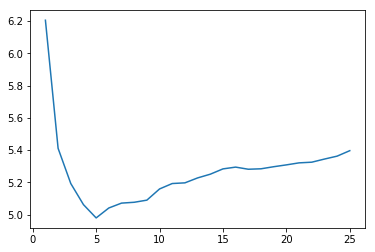

In [33]:
'''
Using the features:
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''

arr_rmse = []
k = 1
for i in range(1,26):
    rmse,t = kfold(normalize(bdata_arr[:,(0,1,5,6,7,9,13)]),2,'knn',i)
    arr_rmse.append((k,rmse))
    k += 1   

arr_rmse = np.asarray(arr_rmse)

plt.plot(arr_rmse[:,0],arr_rmse[:,1])

Based on the plot above, the most reasonable choice of K is 4 for this model, as it gives us the lowest RMSE value.